In [1]:
import pandas as pd
import onsetsync

### Load Data

In [2]:
filepath = 'example_data/CSS_Song2.csv'
CSS_Song2 = pd.read_csv(filepath)
#print(CSS_Song2.head())

### Read Data

In [3]:
columns = ['Piece', 'Section', 'Label.SD','Clave','Bass','Guitar','Tres', 'SD', 'Cycle', 'Isochronous.SD.Time']
df = CSS_Song2[columns]
print(df.head())

    Piece Section Label.SD  Clave      Bass    Guitar      Tres  SD  Cycle  \
0  Song_2     Son      1:1    NaN       NaN       NaN       NaN   1      1   
1  Song_2     Son      1:2    NaN       NaN  5.281932       NaN   2      1   
2  Song_2     Son      1:3    NaN       NaN  5.480643       NaN   3      1   
3  Song_2     Son      1:4    NaN  5.714555  5.707537  5.730943   4      1   
4  Song_2     Son      1:5    NaN  5.927078  5.939071  5.917083   5      1   

   Isochronous.SD.Time  
0             5.037333  
1             5.260062  
2             5.482792  
3             5.705521  
4             5.928250  


### Summarise Onsets

In [4]:
summary = onsetsync.summarise_onsets(df=df, instr=['Clave','Bass','Guitar','Tres','Isochronous.SD.Time'], plot=False)
summary.round(1)

,N,Md,M,SD,Min,Max
Clave,486,666.4,703.6,173.7,192.0,1558.1
Bass,486,471.4,708.1,431.5,180.0,1985.2
Guitar,1401,223.6,244.5,91.4,175.1,1694.9
Tres,906,245.0,371.4,234.4,147.1,1986.5
Isochronous.SD.Time,1567,220.4,220.1,2.9,212.8,226.6


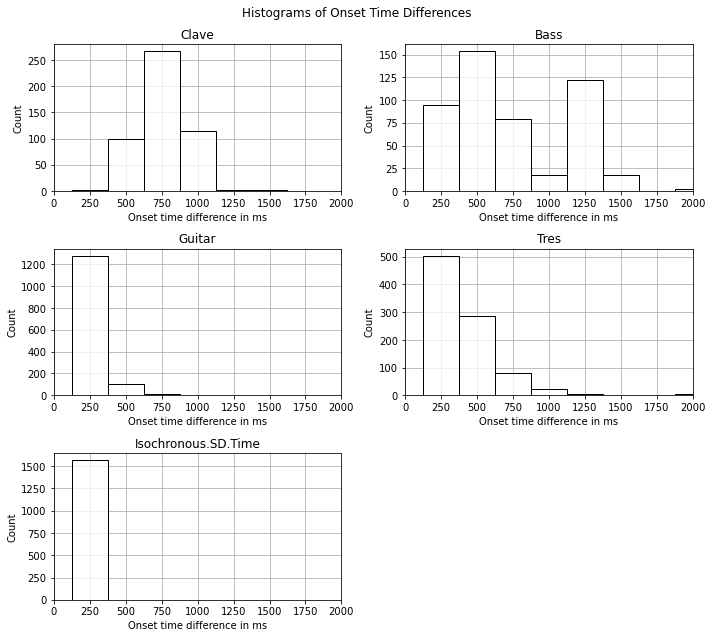

In [5]:
summary = onsetsync.summarise_onsets(df=df, instr=['Clave','Bass','Guitar','Tres','Isochronous.SD.Time'], plot=True)

### Analysis of Synchrony

#### Fig 1

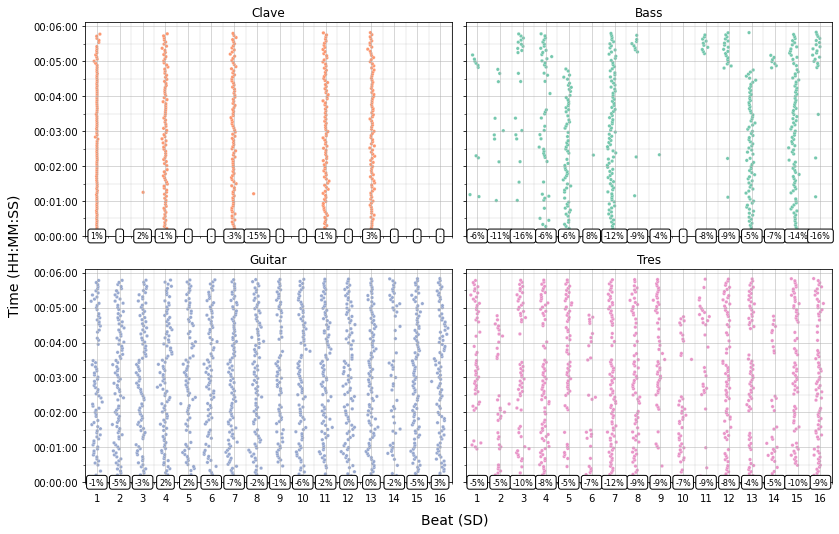

In [6]:
instr=['Clave','Bass','Guitar','Tres']
beat = 'SD'
virtual = 'Isochronous.SD.Time'

onsetsync.plot_by_beat(df=df, instr=instr, beat=beat, virtual=virtual, pcols=2, griddeviations=True, colourpalette='Set2')


#### Fig 2

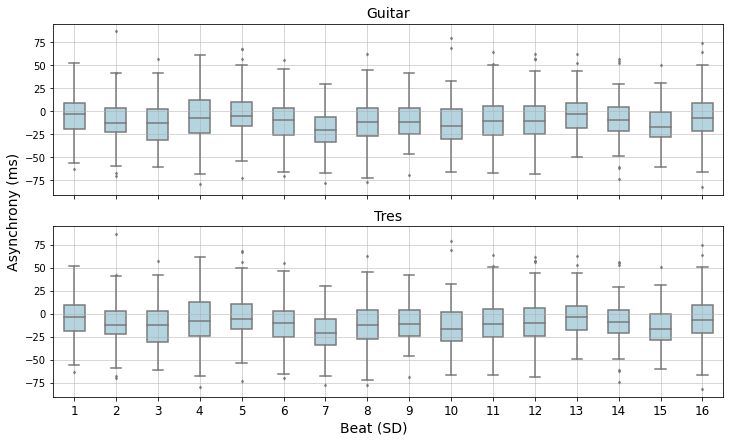

In [7]:
instr=['Guitar', 'Tres']
beat = 'SD'
virtual = 'Isochronous.SD.Time'

onsetsync.boxplot_by_beat(df=df, instr=instr, beat=beat, virtual=virtual, pcols=1, color='lightblue')


### Synchrony between instruments

#### Specific Instrument Pairs

In [8]:
# Calculate the number of joint onsets between two instruments

njoint = onsetsync.sync_joint_onsets(df=df, instr1='Guitar', instr2='Tres')
print(njoint)

853


In [15]:
# Samples and analyzes asynchronies between two instruments' onsets

d1_df = onsetsync.sync_sample_paired(df, instr1="Guitar", instr2="Tres", n=0, bootn=1, beat="SD", verbose=True)

# Compute the summaries and round to 5 decimal places
summary = {
    'N': len(d1_df),
    'Mean.ms': round(d1_df['asynch'].mean() * 1000, 5),
    'Sd.ms': round(d1_df['asynch'].std() * 1000, 5)
}

print(summary)

onsets in common: 853
take all onsets: 853
{'N': 853, 'Mean.ms': 12.53126, 'Sd.ms': 26.74134}


#### Multiple Instruments Pair-wise Asynchronies

In [10]:
# Calculate asynchronies across all pairs of instruments

d2_df = onsetsync.sync_execute_pairs(df, instruments=["Clave","Bass","Guitar","Tres"], n=0, bootn=1, beat='SD')
print(d2_df['asynch'].head())
print(d2_df['beatL'].head())

   Clave-Bass  Clave-Guitar  Clave-Tres  Bass-Guitar  Bass-Tres  Guitar-Tres
0   -0.005196     -0.052647    0.012758    -0.019380  -0.004235     0.056199
1   -0.016020      0.016935   -0.004882    -0.049185  -0.021254    -0.016193
2    0.016186      0.001911    0.004294    -0.007063   0.044074    -0.013076
3   -0.030461      0.009926    0.042091    -0.005700  -0.071003     0.000812
4    0.036520     -0.008692    0.006145    -0.025433  -0.028495     0.072709
   Clave-Bass  Clave-Guitar  Clave-Tres  Bass-Guitar  Bass-Tres  Guitar-Tres
0         4.0          11.0        13.0         13.0        4.0            3
1         1.0          13.0         1.0         13.0        7.0           15
2        13.0          11.0         7.0          5.0        7.0           13
3        13.0           7.0         4.0          7.0        3.0           13
4         7.0          13.0         7.0         15.0        7.0           16


#### Fig 3

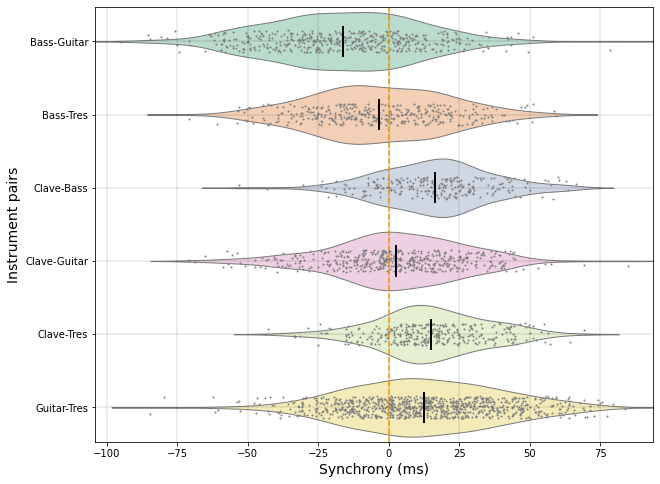

In [11]:
# Violin plot of asynchronies by instrument pair

onsetsync.plot_by_pair(df=d2_df, bybeat=False, reference=0, colourpalette='Pastel2')

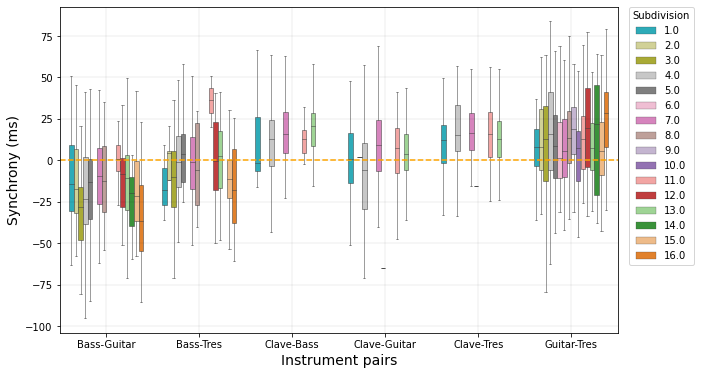

In [12]:
# Boxplot of asynchronies by instrument pair and beat level

onsetsync.plot_by_pair(df=d2_df, bybeat=True, reference=0, colourpalette='tab20_r')

### Plain Summaries of Asynchrony